In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate


In [ ]:
from google.colab import files
student_mat = files.upload()

Saving student_mat.csv to student_mat.csv


In [ ]:
student_mat = pd.read_csv('student_mat.csv')

In [ ]:
#my question is how can we predict if a student will drink alcohol?

In [ ]:
student_mat.shape

(395, 33)

In [ ]:
student_mat

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,sex_M,Pstatus_T,schoolsup_yes,famsup_yes,activities_yes,romantic_yes,famsize_LE3,address_U,avg,sum
0,18,4,4,2,0,4,3,4,1,1,...,0,0,1,0,0,0,0,1,1.0,0
1,17,1,1,2,0,5,3,3,1,1,...,0,1,0,1,0,0,0,1,1.0,0
2,15,1,1,2,3,4,3,2,2,3,...,0,1,1,0,0,0,1,1,2.5,1
3,15,4,2,3,0,3,2,2,1,1,...,0,1,0,1,1,1,0,1,1.0,0
4,16,3,3,2,0,4,3,2,1,2,...,0,1,0,1,0,0,0,1,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,5,5,4,4,5,...,1,0,0,1,0,0,1,1,4.5,1
391,17,3,1,1,0,2,4,5,3,4,...,1,1,0,0,0,0,1,1,3.5,1
392,21,1,1,1,3,5,5,3,3,3,...,1,1,0,0,0,0,0,0,3.0,1
393,18,3,2,1,0,4,4,1,3,4,...,1,1,0,0,0,0,1,0,3.5,1


In [ ]:
# I will be deleting the colunms that don't offer valuable data to my project.

In [ ]:
student_mat.drop(
    labels=['school', 'reason', 'paid', 'internet', 'G1', 'G2', 'G3'],
    axis=1,
    inplace=True
)

In [ ]:
student_mat.drop(
    labels=['nursery', 'Mjob', 'Fjob'],
    axis=1,
    inplace=True
)

In [ ]:
student_mat.drop(
    labels=['guardian','traveltime', 'absences', 'higher'],
    axis=1,
    inplace=True
)

In [ ]:
student_mat.head()

In [ ]:
#here I am coutinuing with my data cleaning, deleting nulls.

In [ ]:
student_mat.isnull().sum()
#there are no null values in our data.

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
studytime     0
failures      0
schoolsup     0
famsup        0
activities    0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
dtype: int64

In [ ]:
student_mat.shape

(395, 19)

In [ ]:
student_mat.drop_duplicates()

In [ ]:
#no duplicated data was found.
student_mat.shape

(395, 19)

In [ ]:
#we have a lot of categorical data that we need to standardize. these are sex, address, famsize, Pstatus, schoolsup, famsup, activities and romantic.

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['sex'], drop_first=True)

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['Pstatus'], drop_first=True)

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['schoolsup'], drop_first=True)

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['famsup', 'activities', 'romantic'], drop_first=True)

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['famsize'], drop_first=True)

In [ ]:
student_mat = pd.get_dummies(student_mat, columns=['address'], drop_first=True)

In [ ]:
student_mat

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,sex_M,Pstatus_T,schoolsup_yes,famsup_yes,activities_yes,romantic_yes,famsize_LE3,address_U
0,18,4,4,2,0,4,3,4,1,1,3,0,0,1,0,0,0,0,1
1,17,1,1,2,0,5,3,3,1,1,3,0,1,0,1,0,0,0,1
2,15,1,1,2,3,4,3,2,2,3,3,0,1,1,0,0,0,1,1
3,15,4,2,3,0,3,2,2,1,1,5,0,1,0,1,1,1,0,1
4,16,3,3,2,0,4,3,2,1,2,5,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,5,5,4,4,5,4,1,0,0,1,0,0,1,1
391,17,3,1,1,0,2,4,5,3,4,2,1,1,0,0,0,0,1,1
392,21,1,1,1,3,5,5,3,3,3,3,1,1,0,0,0,0,0,0
393,18,3,2,1,0,4,4,1,3,4,5,1,1,0,0,0,0,1,0


In [ ]:
# all of our categories are now numerical. In order to have a single value on alcohol use,
# I will get the the average number and the sum between Dalc and	Walc (daily and weekley alcohol consumtion)

In [ ]:
student_mat['avg'] = student_mat[['Dalc', 'Walc']].mean(axis=1)


In [ ]:
student_mat

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,sex_M,Pstatus_T,schoolsup_yes,famsup_yes,activities_yes,romantic_yes,famsize_LE3,address_U,avg
0,18,4,4,2,0,4,3,4,1,1,3,0,0,1,0,0,0,0,1,1.0
1,17,1,1,2,0,5,3,3,1,1,3,0,1,0,1,0,0,0,1,1.0
2,15,1,1,2,3,4,3,2,2,3,3,0,1,1,0,0,0,1,1,2.5
3,15,4,2,3,0,3,2,2,1,1,5,0,1,0,1,1,1,0,1,1.0
4,16,3,3,2,0,4,3,2,1,2,5,0,1,0,1,0,0,0,1,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,2,2,5,5,4,4,5,4,1,0,0,1,0,0,1,1,4.5
391,17,3,1,1,0,2,4,5,3,4,2,1,1,0,0,0,0,1,1,3.5
392,21,1,1,1,3,5,5,3,3,3,3,1,1,0,0,0,0,0,0,3.0
393,18,3,2,1,0,4,4,1,3,4,5,1,1,0,0,0,0,1,0,3.5


In [ ]:
student_mat['sum'] = student_mat[['Dalc', 'Walc']].sum(axis=1)

In [ ]:
student_mat['sum'] = [0 if x == 2 else 1 for x in student_mat['sum'] ]

In [ ]:
student_mat.head()

In [ ]:
#in this code I used linear regression to model the relationship
# between a student's family support and free time to a teen's alcohol consumtion.


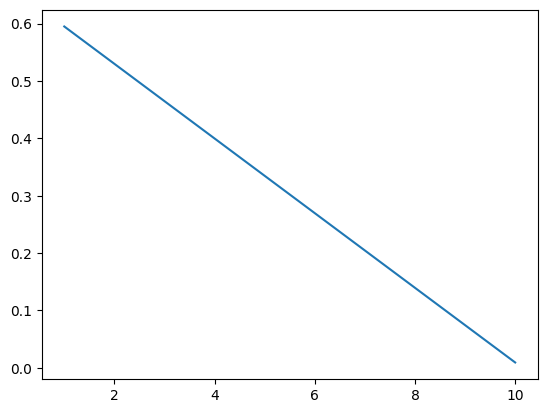

In [ ]:
lr = LinearRegression()
lr.fit(np.array(student_mat['famsup_yes']).reshape(-1,1), student_mat['sum'])
X = np.linspace(1,10,2)
plt.plot(X,lr.coef_*X+lr.intercept_)

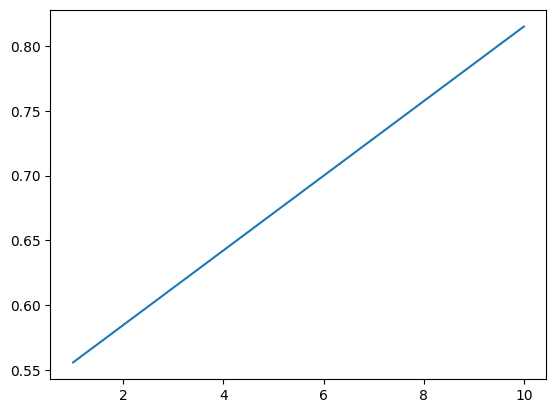

In [ ]:
lr = LinearRegression()
lr.fit(np.array(student_mat['freetime']).reshape(-1,1), student_mat['sum'])
X = np.linspace(1,10,2)
plt.plot(X,lr.coef_*X+lr.intercept_)

In [ ]:
# the model I decided to use in order to make my predictions is Random forest,due to the many observations and
# in the code below I used confusion matrix to evaluate our model's accuracy.
# our score was from 59 to 63

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(student_mat[['famsup_yes',	'activities_yes',	'romantic_yes', 'failures',	'famrel',	'freetime',	'goout', 'studytime','age']], student_mat['sum'], test_size=.3)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred= rf.predict(X_test)
score= rf.score(X_test,y_test)
confusion_matrix(pred, y_test)


array([[17, 22],
       [21, 59]])

In [ ]:
print(score)

0.6386554621848739


In [ ]:
#in the code below we will see the most important features in the random forest model.

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.180720)
2. feature 8 (0.171915)
3. feature 5 (0.152149)
4. feature 7 (0.125054)
5. feature 4 (0.121999)
6. feature 2 (0.071964)
7. feature 1 (0.063285)
8. feature 0 (0.058125)
9. feature 3 (0.054789)


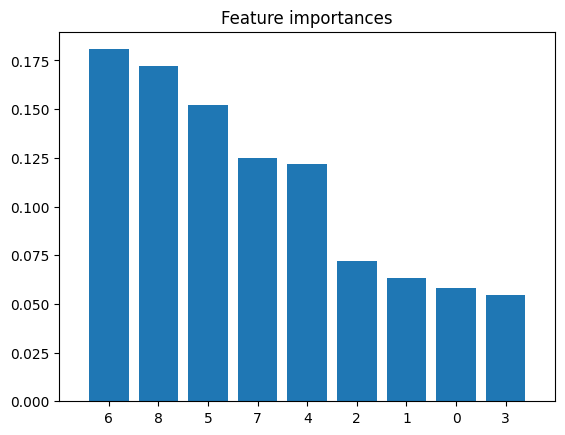

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices])
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()